# Project: Wrangling and Analyze Data

In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import time
import datetime
import requests
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [381]:
df=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [382]:
# URL downloaded programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Read TSV file
df1= pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [383]:
#declare an empty list
df_list = []

# Open text file for reading
with open ('tweet-json.txt', 'r') as json_file:
    for line in json_file.readlines():
        # Read each JSON string status into a dictionary and reading each line as a dictionary
        each_tweet_line = json.loads(line)
        # Getting the required parameters
        tweet_id = each_tweet_line['id']
        retwt_count = each_tweet_line['retweet_count']
        fav_count = each_tweet_line['favorite_count']
        follows_count = each_tweet_line['user']['followers_count']
        frnds_count = each_tweet_line['user']['friends_count']
        
        df_list.append({'id': tweet_id,
                       'retweet_count': retwt_count,
                       'favorite_count': fav_count,
                       'followers_count': follows_count,
                       'friends_count': frnds_count})
        
df2= pd.DataFrame(df_list, columns=['id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])

In [384]:
df2

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104
...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,104
2350,666044226329800704,147,311,3201018,104
2351,666033412701032449,47,128,3201018,104
2352,666029285002620928,48,132,3201018,104


In [385]:
df_list

[{'id': 892420643555336193,
  'retweet_count': 8853,
  'favorite_count': 39467,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 892177421306343426,
  'retweet_count': 6514,
  'favorite_count': 33819,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 891815181378084864,
  'retweet_count': 4328,
  'favorite_count': 25461,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 891689557279858688,
  'retweet_count': 8964,
  'favorite_count': 42908,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 891327558926688256,
  'retweet_count': 9774,
  'favorite_count': 41048,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 891087950875897856,
  'retweet_count': 3261,
  'favorite_count': 20562,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 890971913173991426,
  'retweet_count': 2158,
  'favorite_count': 12041,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 890729181411237888,
  'retweet_count': 16716,
 

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Visual Assessment

In [386]:
#Assessing the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) visually
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


## A Desciption on columns to help understand the data

tweet_id: the unique identifier for each tweet

in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID

timestamp: time when this Tweet was created

source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client

text: actual UTF-8 text of the status update

retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID

retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID

retweeted_status_timestamp: time of retweet

expanded_urls: tweet URL

rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10

rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10

name: name of the dog

doggo: one of the 4 dog "stage"

floofer: one of the 4 dog "stage"

pupper: one of the 4 dog "stage"

puppo: one of the 4 dog "stage"

In [387]:
#assessing dataframe visually
df1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## A Desciption on columns to help understand the data

tweet_id: the unique identifier for each tweet

jpg_url: dog's image URL

img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)

p1: algorithm's #1 prediction for the image in the tweet

p1_conf: how confident the algorithm is in its #1 prediction

p1_dog: whether or not the #1 prediction is a breed of dog

p2: algorithm's #2 prediction for the image in the tweet

p2_conf: how confident the algorithm is in its #2 prediction

p2_dog: whether or not the #2 prediction is a breed of dog

p3: algorithm's #3 prediction for the image in the tweet

p3_conf: how confident the algorithm is in its #3 prediction

p3_dog: whether or not the #3 prediction is a breed of dog

In [389]:
df2

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104
...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,104
2350,666044226329800704,147,311,3201018,104
2351,666033412701032449,47,128,3201018,104
2352,666029285002620928,48,132,3201018,104


## Assessing Data Frame programmatic

I will apply methods to assess dataframe

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [391]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [392]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
 4   friends_count    2354 non-null   int64
dtypes: int64(5)
memory usage: 92.1 KB


##Checking the Columns Header

In [393]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [394]:
df1.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [395]:
df2.columns

Index(['id', 'retweet_count', 'favorite_count', 'followers_count',
       'friends_count'],
      dtype='object')

##Checking the number of rows and columns

In [396]:
df.shape

(2356, 17)

In [397]:
df1.shape

(2075, 12)

In [398]:
df2.shape

(2354, 5)

##Let's look at a description of data in dataframe

In [399]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [400]:
df1.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [401]:
df2.describe()

,id,retweet_count,favorite_count,followers_count,friends_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03,2354.0
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06,104.0
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01,0.0
min,6.660209e+17,0.000000,0.000000,3.200799e+06,104.0
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06,104.0
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06,104.0
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06,104.0
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06,104.0


##Checking for duplicates

In [402]:
sum(df.duplicated())

0

In [403]:
sum(df1.duplicated())

0

In [404]:
sum(df2.duplicated())

0

In [405]:
##Checking for missing values in our DataSets

In [406]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [407]:
df1.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [408]:
df2.isnull().sum()

id                 0
retweet_count      0
favorite_count     0
followers_count    0
friends_count      0
dtype: int64

let's observe a sample data from the Dataframes

In [409]:
df.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
67,879376492567855104,NaN,NaN,2017-06-26 16:31:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jack AKA Stephen Furry. You're not sco...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879376492...,12,10,Jack,None,None,None,None
179,857214891891077121,8.571567e+17,180670967.0,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
653,792050063153438720,NaN,NaN,2016-10-28 17:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remus. He's a mop that came to life. C...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792050063...,11,10,Remus,None,None,None,None
1418,698355670425473025,NaN,NaN,2016-02-13 03:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessiga. She's a Tasmanian McCringlebe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698355670...,10,10,Jessiga,None,None,None,None
702,786036967502913536,NaN,NaN,2016-10-12 02:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Scout. He really wants ...,7.798343e+17,4.196984e+09,2016-09-25 00:06:08 +0000,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,None,None,None,None
1064,740995100998766593,NaN,NaN,2016-06-09 19:52:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a vape god. Blows o's for da...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740995100...,10,10,Leo,None,None,None,None
501,813096984823349248,NaN,NaN,2016-12-25 19:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813096984...,11,10,Rocky,doggo,None,None,None
1632,684460069371654144,NaN,NaN,2016-01-05 19:42:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He's a Western Sagittarius Dookm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684460069...,10,10,Jeph,None,None,None,None


In [410]:
df1.sample(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
499,675822767435051008,https://pbs.twimg.com/media/CWEBOFYWwAA-O2c.jpg,1,Pomeranian,0.460710,True,chow,0.202765,True,Pekinese,0.133266,True
1183,738537504001953792,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1,chow,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True
170,668992363537309700,https://pbs.twimg.com/media/CUi9ARGWUAEyWqo.jpg,1,lynx,0.287506,False,tabby,0.206048,False,koala,0.081419,False
579,678764513869611008,https://pbs.twimg.com/media/CWt0ubZWcAAkFER.jpg,1,Irish_terrier,0.696646,True,Australian_terrier,0.074962,True,Irish_setter,0.063901,True
1460,778039087836069888,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,2,German_shepherd,0.717776,True,malinois,0.111175,True,Norwegian_elkhound,0.058802,True
105,667861340749471744,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,malamute,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True
79,667453023279554560,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True
1505,785264754247995392,https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg,1,teddy,0.674893,False,cradle,0.056740,False,chow,0.056137,True


In [411]:
df2.sample(8)

,id,retweet_count,favorite_count,followers_count,friends_count
2234,668154635664932864,336,522,3201015,104
1337,704871453724954624,1245,4585,3200947,104
82,876537666061221889,4800,23869,3200892,104
1448,695816827381944320,1320,3287,3200950,104
877,760641137271070720,1481,5485,3200908,104
760,778286810187399168,3836,11576,3200902,104
1013,747103485104099331,4548,10534,3200943,104
1035,744709971296780288,1771,6150,3200943,104


In [412]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Quality issues
1. twitter-archive-enhanced.csv table : retweeted_status_id for missing values

2. twitter-archive-enhanced.csv table : Wrong Datatype TimeStamp 

3. twitter-archive-enhanced.csv table : Wrong Datatype Text

4. twitter-archive-enhanced.csv table : missing values for in_reply_to_status_id

5. tweet image prediction : Erroneous datatypes for p1 , p2 & p3 should be string

6. twitter-archive-enhanced.csv table : missing values for in_reply_to_user_id ,retweeted_status_user_id ,expanded_urls, retweeted_status_timestamp.

7.  twitter-archive-enhanced.csv table : Erroneous datatypes for name column

8.  twitter-archive-enhanced.csv table: Wrong Datatype (ource column) should be a string

### Tidiness issues
1. Columns (doggo, floofer, pupper, puppo) are categorical data for dog and should be in a column

2. tweet_json.txt : ID Column has similar values with Tweet_id in the other dataframe, should be rename

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [414]:
# Make copies of original pieces of data
df_copy = df.copy()
df1_copy = df1.copy()
df2_copy = df2.copy()

### Issue #1:
retweeted_status_id for missing valuesand won't needed in my analysis

#### Define:
Drop the column retweeted_status_id

#### Code

In [415]:
df_copy.drop(['retweeted_status_id'], axis = 1, inplace = True)

#### Test

In [416]:
df_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #2:
Wrong Datatype in timestamp

#### Define
change the Datatype of Timestamp to Datetime

#### Code

In [417]:
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])

#### Test

In [418]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    object             
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2356 non-null   int64           

### Issue #3:
twitter-archive-enhanced.csv table : Wrong Datatype for text column

#### Define
Change Datatype from Object to String

#### Code

In [419]:
df_copy['text'] = df_copy['text'].astype('string')  

#### Test

In [420]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   string             
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    object             
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2356 non-null   int64           

### Issue #4:
twitter-archive-enhanced.csv table : missing values for in_reply_to_status_id

#### Define
I will drop the in_reply_to_status_id column  it will not be need in our analysis

#### Code

In [421]:
df_copy.drop(['in_reply_to_status_id'], axis = 1, inplace = True)

#### Test

In [422]:
df_copy.columns

Index(['tweet_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #5:
Erroneous datatypes for p1 , p2 & p3 should be string

#### Define
I will change the datatype to string

#### Code

In [423]:
df1_copy['p1'] = df1_copy['p1'].astype('string')  
df1_copy['p2'] = df1_copy['p2'].astype('string') 
df1_copy['p3'] = df1_copy['p3'].astype('string')

#### Test

In [424]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   string 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   string 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   string 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(1), string(3)
memory usage: 152.1+ KB


### Issue #6:
missing values for in_reply_to_user_id ,retweeted_status_user_id ,expanded_urls ,retweeted_status_timestamp.

#### Define
Drop the columns - those coumns will not be needed for derivng insight.

#### Code

In [425]:
df_copy.drop(['in_reply_to_user_id','retweeted_status_user_id','expanded_urls','retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [426]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   string             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6), string(1)
memory usage: 202.6+ KB


### Issue #7:
Erroneous datatypes for (name) column

#### Define
Name column values should have a string datatype and not object

#### Code

In [427]:
df_copy['name'] = df_copy['name'].astype('string')

#### Test

In [428]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   string             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   string             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5), string(2)
memory usage: 202.6+ KB


### Issue #8:
Erroneous datatypes for (source) column

#### Define:
Convert the source column from object to string.

#### Code

In [429]:
df_copy['source'] = df_copy['source'].astype('string')

#### Test

In [430]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   string             
 3   text                2356 non-null   string             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   string             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4), string(3)
memory usage: 202.6+ KB


### Tidiness Issue 01;
Columns (doggo, floofer, pupper, puppo) are categorical data for dog and should be in a column

### Define
combine the four columns and form a new column called Stage_attribute

In [431]:
# I want to change the value of each categorical column to empty.
df_copy.doggo.replace('None', '', inplace=True)
df_copy.floofer.replace('None', '', inplace=True)
df_copy.pupper.replace('None', '', inplace=True)
df_copy.puppo.replace('None', '', inplace=True)

# Create a column stage_attrbute and combine the columns
df_copy['stage_attribute'] = df_copy.doggo + df_copy.floofer + df_copy.pupper + df_copy.puppo


#Then format entries with multiple dog stages which appeared like doggopuppo
df_copy.loc[df_copy.stage_attribute == 'doggopupper', 'stage_attribute'] = 'doggo,pupper'
df_copy.loc[df_copy.stage_attribute == 'doggopuppo', 'stage_attribute'] = 'doggo,puppo'
df_copy.loc[df_copy.stage_attribute == 'doggofloofer', 'stage_attribute'] = 'doggo,floofer'



In [432]:
df_copy.stage_attribute.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: stage_attribute, dtype: int64

In [433]:
#Drop the categorial column
df_copy.drop(['doggo', 'floofer' ,'pupper', 'puppo'], axis = 1, inplace = True)

df_copy['stage_attribute'] = df_copy['stage_attribute'].replace('', np.nan)

In [435]:
df_copy.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage_attribute
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN


### Tidiness Issue 02;
tweet_json.txt : ID Column has similar values with Tweet_id in the other dataframe, should be rename.

### Define
renaming the id column 

### Code

In [436]:
df2_copy.rename(columns={'id': 'tweet_id'}, inplace=True)

### Test

In [437]:
df2_copy.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'followers_count',
       'friends_count'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [438]:
#MERGE THE THEE DATASETS AS ONE

dataset = pd.merge(df_copy, df1_copy, on='tweet_id', how='inner').merge(df2_copy, on='tweet_id', how='inner' )

# Saving the master dataset to a csv file
dataset.to_csv("twitter_archive_master.csv", index=False)



In [439]:
#df_oopy.merge(df1_copy, left_on='tweet_id', right_on='rkey')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   int64              
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   string             
 3   text                2073 non-null   string             
 4   rating_numerator    2073 non-null   int64              
 5   rating_denominator  2073 non-null   int64              
 6   name                2073 non-null   string             
 7   stage_attribute     320 non-null    object             
 8   jpg_url             2073 non-null   object             
 9   img_num             2073 non-null   int64              
 10  p1                  2073 non-null   string             
 11  p1_conf             2073 non-null   float64            
 12  p1_dog              2073 non-null 

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [440]:
dataset.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,followers_count,friends_count
count,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2073.000000,2.073000e+03,2073.0
mean,7.383634e+17,12.265798,10.511819,1.203570,0.594532,1.346665e-01,6.034005e-02,2976.089243,8556.718283,3.200945e+06,104.0
std,6.780118e+16,40.699924,7.180517,0.561856,0.271234,1.006830e-01,5.092769e-02,5054.897526,12098.640994,4.497651e+01,0.0
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000,3.200799e+06,104.0
25%,6.764706e+17,10.000000,10.000000,1.000000,0.364095,5.390140e-02,1.619920e-02,634.000000,1674.000000,3.200900e+06,104.0
50%,7.119681e+17,11.000000,10.000000,1.000000,0.588230,1.186220e-01,4.947150e-02,1408.000000,3864.000000,3.200947e+06,104.0
75%,7.931959e+17,12.000000,10.000000,1.000000,0.843911,1.955730e-01,9.193000e-02,3443.000000,10937.000000,3.201002e+06,104.0
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000,3.201018e+06,104.0


In [441]:
dataset.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage_attribute,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889,104
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,3200889,104
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,3200889,104
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,3200889,104
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,3200889,104


In [446]:
dataset.groupby(['stage_attribute'])['followers_count'].sum()

stage_attribute
doggo            214460749
doggo,floofer      3200892
doggo,pupper      35210032
doggo,puppo        3200891
floofer           22406470
pupper           672198936
puppo             73620871
Name: followers_count, dtype: int64

### Insights:
1. The minimum retweet_count is 16 whie the maximum is 79515

2. The minimum favorite_count is 0	whie the maximum is 132810

3.

### Visualization

In [ ]:
df2.groupby('release_year')['revenue'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')
plt.title('first 10 revenue generated by year')
plt.xlabel('release year')
plt.ylabel('revenue generated')

# does increase in followers_count has any effect in favorite_count?

In [314]:
def scatter_plot(j, k, p):
    sns.regplot(x = df2[j],y = df2[k])
    plt.title(p)
    plt.xlabel(j)
    plt.ylabel(k)
    plt.show() 

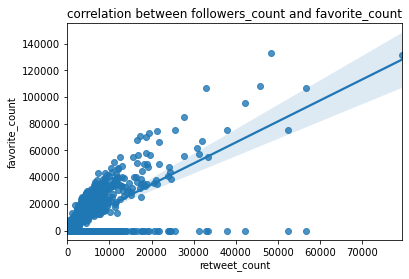

In [317]:
scatter_plot('retweet_count','favorite_count','correlation between followers_count and favorite_count')# from the chart , it shows that there is a
# strong correlation between followers_count and favorite_count

# does increase in favorite_count has any effect in retweet_count?

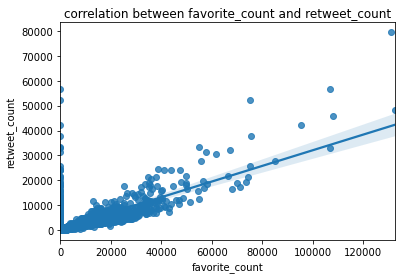

In [316]:
scatter_plot('favorite_count','retweet_count','correlation between favorite_count and retweet_count')# from the chart , it shows that there is a
# strong correlation between favorite_count and retweet_count